In [1]:
import numpy as np
from helpers.data_loading import *
import matplotlib.pyplot as plt
import mord
%matplotlib inline
from spearman import score_function

In [2]:
embeddings = np.load("data/embeddings/CNN_faces_1k.npy")

In [3]:
y, _ = load_labels()

In [4]:
y.shape

(10000,)

In [5]:
meta, _ = load_meta_features(only_num=True)
meta_to_predict, _ = load_meta_features('data/facial_features_test.csv', only_num=True)
to_keep = list(set(meta.columns).intersection(set(meta_to_predict.columns)))
to_keep.sort()  # sort in alphabetical order to always have the same order
meta_train = meta[to_keep][0:9500]
meta_test = meta[to_keep][9500:10000]

In [6]:
embeddings_train = embeddings[0:9500, :]
embeddings_test = embeddings[9500:10000, :]
embeddings_to_predict = embeddings[10000:13000, :]
y_train = y[0:9500]
y_test = y[9500:10000]

In [7]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier

In [19]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [20]:
X_train = np.hstack((embeddings_train, meta_train))
X_test = np.hstack((embeddings_test, meta_test))
X_to_predict = np.hstack((embeddings_to_predict, meta_to_predict))

In [21]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [22]:
preds = clf.predict(X_test)

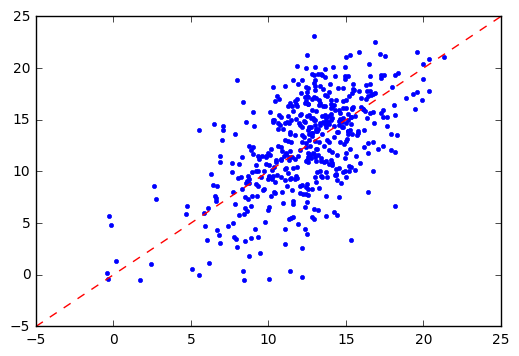

In [23]:
plt.plot(preds+np.random.uniform(-0.5, 0.5, preds.shape), y_test+np.random.uniform(-0.5, 0.5, y_test.shape), '.')
plt.plot([-5, 25], [-5, 25], 'r--')

True label: 7


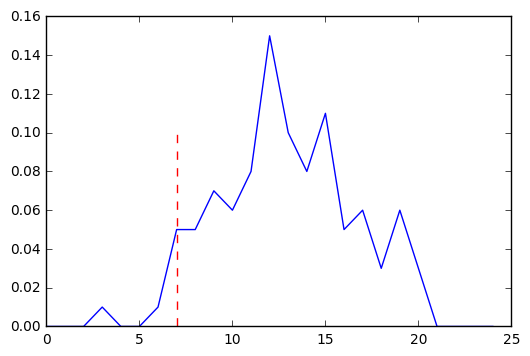

In [24]:
i = 400
print 'True label:', y_test[i]
plt.plot(clf.predict_proba(X_test)[i])
plt.plot([y_test[i], y_test[i]], [0, 0.1], 'r--')

In [25]:
score_function(y_test, np.round(preds))

0.55245649730295554

In [26]:
from scipy.stats import ranksums

In [27]:
predicted_prob = clf.predict_proba(X_test)

RanksumsResult(statistic=-0.12611852501889315, pvalue=0.89963810371295405)
True label: 0 - 18


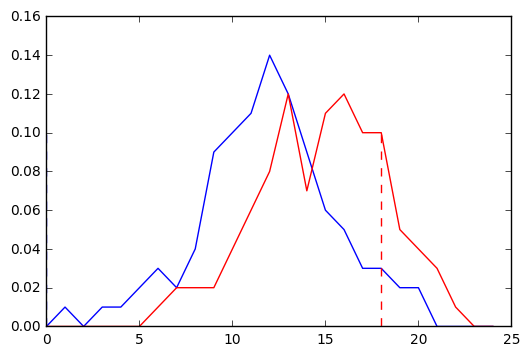

In [28]:
i,j = 2,12
print ranksums(predicted_prob[j], predicted_prob[i])
print 'True label:', y_test[i], '-', y_test[j]
plt.plot(clf.predict_proba(X_test)[i])
plt.plot([y_test[i], y_test[i]], [0, 0.1], 'b--')
plt.plot(clf.predict_proba(X_test)[j], 'r')
plt.plot([y_test[j], y_test[j]], [0, 0.1], 'r--')

In [29]:
y_test[1]

6

In [30]:
from PIL import Image

In [31]:
worst_cases = np.argsort(abs(y_test - preds))[::-1]

In [32]:
i = 0

true label 6 predicted 14


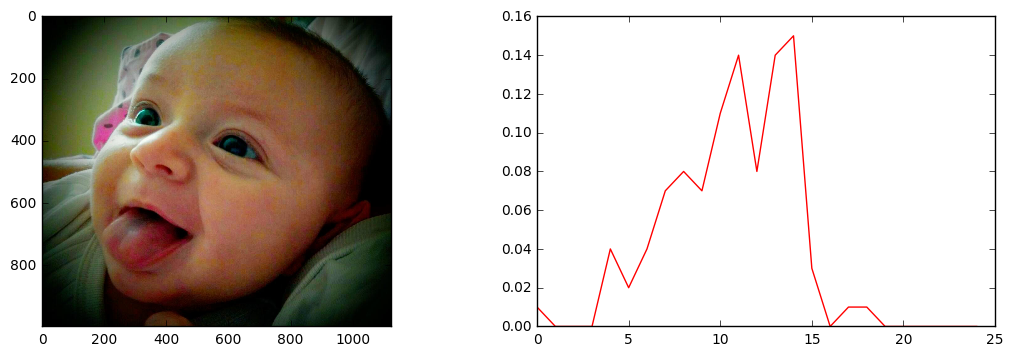

In [48]:
print "true label", y_test[worst_cases[i]], 'predicted', preds[worst_cases[i]]
f, ar = plt.subplots(1, 2, figsize=(13, 4))
ar[0].imshow(np.array(Image.open("data/pictures_train/"+str(9501+worst_cases[i])+'.jpg')))
ar[1].plot(clf.predict_proba(X_test)[worst_cases[i]], 'r')
i = i+1

# Checking if high confidence = good prediction

In [55]:
predict_proba = clf.predict_proba(X_test)

In [72]:
confidence = np.array([])
for i in range(predict_proba.shape[0]):
    confidence = np.append(confidence, predict_proba[i, preds[i]])

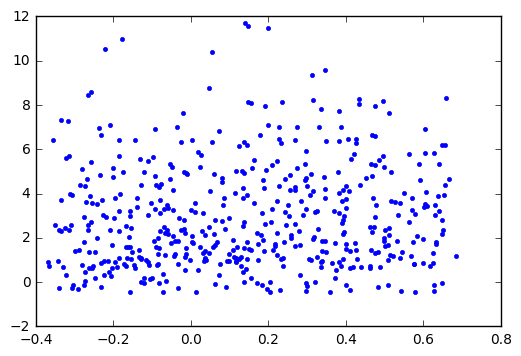

In [79]:
plt.plot(confidence + np.random.uniform(-.5, .5, 500) , np.abs(preds-y_test)+ np.random.uniform(-.5, .5, 500), '.')

In [49]:
def subset_sum(numbers, target, partial=[]):
    s = sum(partial)

    # check if the partial sum is equals to target
    if s == target: 
        print "sum(%s)=%s" % (partial, target)
    if s >= target:
        return  # if we reach the number why bother to continue

    for i in range(len(numbers)):
        n = numbers[i]
        remaining = numbers[i+1:]
        subset_sum(remaining, target, partial + [n]) 


if __name__ == "__main__":
    subset_sum([3,9,8,4,5,7,10],15)

    #Outputs:
    #sum([3, 8, 4])=15
    #sum([3, 5, 7])=15
    #sum([8, 7])=15
    #sum([5, 10])=15

sum([3, 8, 4])=15
sum([3, 5, 7])=15
sum([8, 7])=15
sum([5, 10])=15


In [50]:
subset_sum([0, 1, 2, 3, 4, 5], 13)

sum([0, 1, 3, 4, 5])=13
sum([1, 3, 4, 5])=13


In [51]:
L = []
for a in [0, 1, 2, 3, 4, 5]:
    for b in [0, 1, 2, 3, 4, 5]:
        for c in [0, 1, 2, 3, 4, 5]:
            for d in [0, 1, 2, 3, 4, 5]:
                for e in [0, 1, 2, 3, 4, 5]:
                    L.append(a+b+c+d+e)

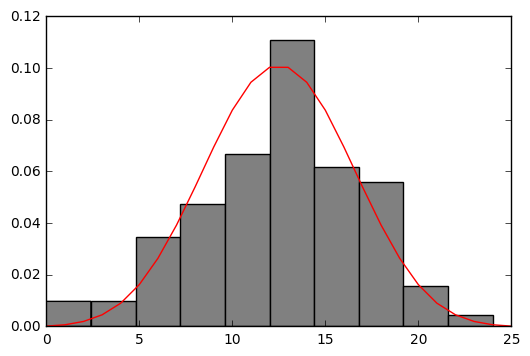

In [52]:
prior = []
for i in range(0, 26):
    # print i, "=>", round(sum(np.array(L) == i)*1./len(L)*100, 2), '%'
    prior.append(sum(np.array(L) == i)*1./len(L))
plt.plot(prior, 'r')
plt.hist(y, normed=True, color='gray')
plt.show()

In [53]:
w, theta = ordinal_logistic_fit(X_train, y_train, verbose=False, solver='TNC')

NameError: name 'ordinal_logistic_fit' is not defined

In [186]:
pred = ordinal_logistic_predict(w, theta, X_test)

In [187]:
print(score_function(y_test, pred))

0.670166900451


In [196]:
phi(np.sum(w*X_test[0]))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


IndexError: index 1 is out of bounds for axis 0 with size 1

In [198]:
np.sum(w*X_test[1])

5.9241761975137468

In [54]:
"""
Implementation of logistic ordinal regression (aka proportional odds) model
"""

from __future__ import print_function

from sklearn import metrics
from scipy import linalg, optimize, sparse
import numpy as np
import warnings

BIG = 1e10
SMALL = 1e-12


def phi(t):
    """
    logistic function, returns 1 / (1 + exp(-t))
    """
    idx = t > 0
    out = np.empty(t.size, dtype=np.float)
    out[idx] = 1. / (1 + np.exp(-t[idx]))
    exp_t = np.exp(t[~idx])
    out[~idx] = exp_t / (1. + exp_t)
    return out

def log_logistic(t):
    """
    (minus) logistic loss function, returns log(1 / (1 + exp(-t)))
    """
    idx = t > 0
    out = np.zeros_like(t)
    out[idx] = np.log(1 + np.exp(-t[idx]))
    out[~idx] = (-t[~idx] + np.log(1 + np.exp(t[~idx])))
    return out


def ordinal_logistic_fit(X, y, alpha=0, l1_ratio=0, n_class=None, max_iter=10000,
                         verbose=False, solver='TNC', w0=None):
    """
    Ordinal logistic regression or proportional odds model.
    Uses scipy's optimize.fmin_slsqp solver.

    Parameters
    ----------
    X : {array, sparse matrix}, shape (n_samples, n_feaures)
        Input data
    y : array-like
        Target values
    max_iter : int
        Maximum number of iterations
    verbose: bool
        Print convergence information

    Returns
    -------
    w : array, shape (n_features,)
        coefficients of the linear model
    theta : array, shape (k,), where k is the different values of y
        vector of thresholds
    """

    X = np.asarray(X)
    y = np.asarray(y)
    w0 = None

    if not X.shape[0] == y.shape[0]:
        raise ValueError('Wrong shape for X and y')

    # .. order input ..
    idx = np.argsort(y)
    idx_inv = np.zeros_like(idx)
    idx_inv[idx] = np.arange(idx.size)
    X = X[idx]
    y = y[idx].astype(np.int)
    # make them continuous and start at zero
    unique_y = np.unique(y)
    for i, u in enumerate(unique_y):
        y[y == u] = i
    unique_y = np.unique(y)

    # .. utility arrays used in f_grad ..
    alpha = 0.
    k1 = np.sum(y == unique_y[0])
    E0 = (y[:, np.newaxis] == np.unique(y)).astype(np.int)
    E1 = np.roll(E0, -1, axis=-1)
    E1[:, -1] = 0.
    E0, E1 = map(sparse.csr_matrix, (E0.T, E1.T))

    def f_obj(x0, X, y):
        """
        Objective function
        """
        w, theta_0 = np.split(x0, [X.shape[1]])
        theta_1 = np.roll(theta_0, 1)
        t0 = theta_0[y]
        z = np.diff(theta_0)

        Xw = X.dot(w)
        a = t0 - Xw
        b = t0[k1:] - X[k1:].dot(w)
        c = (theta_1 - theta_0)[y][k1:]

        if np.any(c > 0):
            return BIG

        #loss = -(c[idx] + np.log(np.exp(-c[idx]) - 1)).sum()
        loss = -np.log(1 - np.exp(c)).sum()

        loss += b.sum() + log_logistic(b).sum() \
            + log_logistic(a).sum() \
            + .5 * alpha * w.dot(w) - np.log(z).sum()  # penalty
        if np.isnan(loss):
            pass
            #import ipdb; ipdb.set_trace()
        return loss

    def f_grad(x0, X, y):
        """
        Gradient of the objective function
        """
        w, theta_0 = np.split(x0, [X.shape[1]])
        theta_1 = np.roll(theta_0, 1)
        t0 = theta_0[y]
        t1 = theta_1[y]
        z = np.diff(theta_0)

        Xw = X.dot(w)
        a = t0 - Xw
        b = t0[k1:] - X[k1:].dot(w)
        c = (theta_1 - theta_0)[y][k1:]

        # gradient for w
        phi_a = phi(a)
        phi_b = phi(b)
        grad_w = -X[k1:].T.dot(phi_b) + X.T.dot(1 - phi_a) + alpha * w

        # gradient for theta
        idx = c > 0
        tmp = np.empty_like(c)
        tmp[idx] = 1. / (np.exp(-c[idx]) - 1)
        tmp[~idx] = np.exp(c[~idx]) / (1 - np.exp(c[~idx])) # should not need
        grad_theta = (E1 - E0)[:, k1:].dot(tmp) \
            + E0[:, k1:].dot(phi_b) - E0.dot(1 - phi_a)

        grad_theta[:-1] += 1. / np.diff(theta_0)
        grad_theta[1:] -= 1. / np.diff(theta_0)
        out = np.concatenate((grad_w, grad_theta))
        return out

    def f_hess(x0, s, X, y):
        x0 = np.asarray(x0)
        w, theta_0 = np.split(x0, [X.shape[1]])
        theta_1 = np.roll(theta_0, 1)
        t0 = theta_0[y]
        t1 = theta_1[y]
        z = np.diff(theta_0)

        Xw = X.dot(w)
        a = t0 - Xw
        b = t0[k1:] - X[k1:].dot(w)
        c = (theta_1 - theta_0)[y][k1:]

        D = np.diag(phi(a) * (1 - phi(a)))
        D_= np.diag(phi(b) * (1 - phi(b)))
        D1 = np.diag(np.exp(-c) / (np.exp(-c) - 1) ** 2)
        Ex = (E1 - E0)[:, k1:].toarray()
        Ex0 = E0.toarray()
        H_A = X[k1:].T.dot(D_).dot(X[k1:]) + X.T.dot(D).dot(X)
        H_C = - X[k1:].T.dot(D_).dot(E0[:, k1:].T.toarray()) \
            - X.T.dot(D).dot(E0.T.toarray())
        H_B = Ex.dot(D1).dot(Ex.T) + Ex0[:, k1:].dot(D_).dot(Ex0[:, k1:].T) \
            - Ex0.dot(D).dot(Ex0.T)

        p_w = H_A.shape[0]
        tmp0 = H_A.dot(s[:p_w]) + H_C.dot(s[p_w:])
        tmp1 = H_C.T.dot(s[:p_w]) + H_B.dot(s[p_w:])
        return np.concatenate((tmp0, tmp1))

        import ipdb; ipdb.set_trace()
        import pylab as pl
        pl.matshow(H_B)
        pl.colorbar()
        pl.title('True')
        import numdifftools as nd
        Hess = nd.Hessian(lambda x: f_obj(x, X, y))
        H = Hess(x0)
        pl.matshow(H[H_A.shape[0]:, H_A.shape[0]:])
        #pl.matshow()
        pl.title('estimated')
        pl.colorbar()
        pl.show()


    def grad_hess(x0, X, y):
        grad = f_grad(x0, X, y)
        hess = lambda x: f_hess(x0, x, X, y)
        return grad, hess

    x0 = np.random.randn(X.shape[1] + unique_y.size) / X.shape[1]
    if w0 is not None:
        x0[:X.shape[1]] = w0
    else:
        x0[:X.shape[1]] = 0.
    x0[X.shape[1]:] = np.sort(unique_y.size * np.random.rand(unique_y.size))

    #print('Check grad: %s' % optimize.check_grad(f_obj, f_grad, x0, X, y))
    #print(optimize.approx_fprime(x0, f_obj, 1e-6, X, y))
    #print(f_grad(x0, X, y))
    #print(optimize.approx_fprime(x0, f_obj, 1e-6, X, y) - f_grad(x0, X, y))
    #import ipdb; ipdb.set_trace()

    def callback(x0):
        x0 = np.asarray(x0)
        # print('Check grad: %s' % optimize.check_grad(f_obj, f_grad, x0, X, y))
        if verbose:
        # check that gradient is correctly computed
            print('OBJ: %s' % f_obj(x0, X, y))

    if solver == 'TRON':
        import pytron
        out = pytron.minimize(f_obj, grad_hess, x0, args=(X, y))
    else:
        options = {'maxiter' : max_iter, 'disp': 0, 'maxfun':10000}
        out = optimize.minimize(f_obj, x0, args=(X, y), method=solver,
            jac=f_grad, hessp=f_hess, options=options, callback=callback)

    if not out.success:
        warnings.warn(out.message)
    w, theta = np.split(out.x, [X.shape[1]])
    return w, theta


def ordinal_logistic_predict(w, theta, X):
    """
    Parameters
    ----------
    w : coefficients obtained by ordinal_logistic
    theta : thresholds
    """
    unique_theta = np.sort(np.unique(theta))
    out = X.dot(w)
    unique_theta[-1] = np.inf # p(y <= max_level) = 1
    tmp = out[:, None].repeat(unique_theta.size, axis=1)
    return np.argmax(tmp < unique_theta, axis=1)

# Using mord 

In [111]:
clf = mord.OrdinalRidge(alpha=0.06, fit_intercept=True, normalize=True)
print clf

OrdinalRidge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=True, random_state=None, solver='auto', tol=0.001)


In [112]:
clf.fit(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)))

OrdinalRidge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=True, random_state=None, solver='auto', tol=0.001)

In [113]:
preds = clf.predict(X_test)

In [114]:
score_function(y_test, preds)

0.68309266448610872

In [115]:
to_submit = clf.predict(X_to_predict)

In [116]:
export_submission(to_submit, "ordinal_ridge_on_embeddings")

In [105]:
X_

NameError: name 'X' is not defined

In [109]:
np.hstack((y_train, y_test))

array([13, 18, 19, ..., 15, 18, 11])

# Small experiment to calculate best possible spearmans

We say we have 5 voters that vote between 0 and 5. There is for each image a latent score $\mu_i$ generate as a uniform distribution on $[0,5]$. For each rater its rating is sampled from a discretized normal distribution centered on $mu_i$ with variance $\sigma^2$.

In [8]:
from scipy.stats import truncnorm, entropy

(array([  233.,   234.,   830.,  1137.,  1599.,  2665.,  1481.,  1342.,
          375.,   104.]),
 array([ 0.  ,  0.48,  0.96,  1.44,  1.92,  2.4 ,  2.88,  3.36,  3.84,
         4.32,  4.8 ]),
 <a list of 10 Patch objects>)

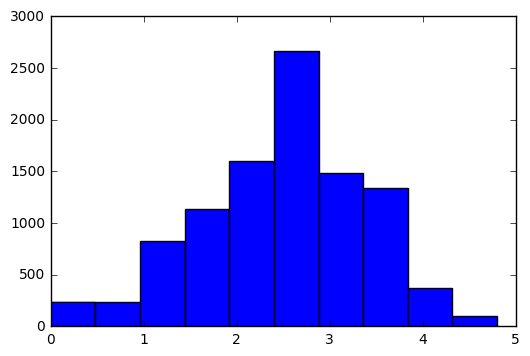

In [11]:
[sum(y/5. == i) for i in range(0, )

In [12]:
def sample_ratings(size=1, sigma=1., seed = 1789):
    np.random.seed(1789)
    #random_scores = np.random.uniform(0, 5, size=size)
    random_scores = np.random.choice(y/5., size=size, replace=True)
    combined_scores = np.array([])
    for score in random_scores:
        #sigma = 2
        a, b = (0 - score) / sigma, (5 - score) / sigma
        ratings = np.round(truncnorm.rvs(a, b, loc=score, scale=sigma, size=5))
        combined_scores = np.append(combined_scores, np.sum(ratings))
    return (random_scores, combined_scores)

In [13]:
random_scores = np.random.uniform(0, 5, size=10**4)
combined_scores = np.array([])
sigma_range = np.arange(.1, 5., .1)
KL_values = np.array([])
achievable_spearman = np.array([])
for sigma in sigma_range:
    random_scores, combined_scores = sample_ratings(10**4, sigma)
    # compute KL divergence
    fitted_distrib = [sum(combined_scores == i)*1./len(combined_scores) for i in range(25)]
    empirical_distrib = [sum(y == i)*1./len(y) for i in range(25)]
    print("Sigma:{} => KL:{}".format(sigma, entropy(fitted_distrib, empirical_distrib)))
    KL_values = np.append(KL_values, entropy(fitted_distrib, empirical_distrib))
    achievable_spearman = np.append(achievable_spearman, score_function(combined_scores, random_scores))

Sigma:0.1 => KL:0.767181542782
Sigma:0.2 => KL:0.285529899492
Sigma:0.3 => KL:0.0612816567226
Sigma:0.4 => KL:0.0107457588466
Sigma:0.5 => KL:0.00736089997569
Sigma:0.6 => KL:0.0100258320051
Sigma:0.7 => KL:0.0138901445229
Sigma:0.8 => KL:0.016267465768
Sigma:0.9 => KL:0.0178189062624
Sigma:1.0 => KL:0.0201412927025
Sigma:1.1 => KL:0.0215756727133
Sigma:1.2 => KL:0.0241550105613
Sigma:1.3 => KL:0.0267899026748
Sigma:1.4 => KL:0.0312808679071
Sigma:1.5 => KL:0.0353756930374
Sigma:1.6 => KL:0.0393260067609
Sigma:1.7 => KL:0.044244820588
Sigma:1.8 => KL:0.0492296670495
Sigma:1.9 => KL:0.0535315506566
Sigma:2.0 => KL:0.0582022488946
Sigma:2.1 => KL:0.0612879496254
Sigma:2.2 => KL:0.0645558312531
Sigma:2.3 => KL:0.0678073115987
Sigma:2.4 => KL:0.069608537168
Sigma:2.5 => KL:0.0721176515053
Sigma:2.6 => KL:0.0734230825389
Sigma:2.7 => KL:0.0753517435273
Sigma:2.8 => KL:0.077168906249
Sigma:2.9 => KL:0.0776620198349
Sigma:3.0 => KL:0.0782451884586
Sigma:3.1 => KL:0.079048723684
Sigma:3.2 => K

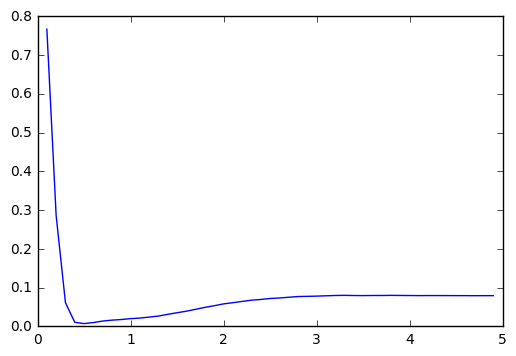

In [14]:
plt.plot(sigma_range, KL_values)

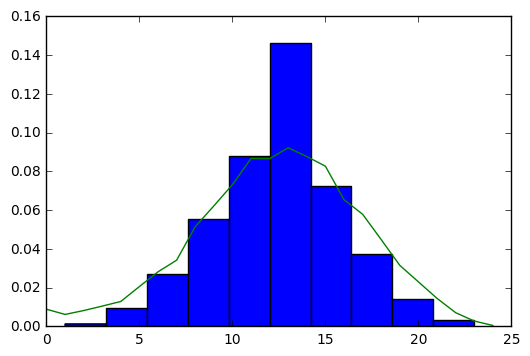

In [15]:
plt.hist(sample_ratings(10**4, 2.)[1], normed=True)
plt.plot(empirical_distrib)
plt.show()

In [19]:
random_scores, combined_scores = sample_ratings(10000, 1.0)
score_function(combined_scores, random_scores)

0.86155697243016571

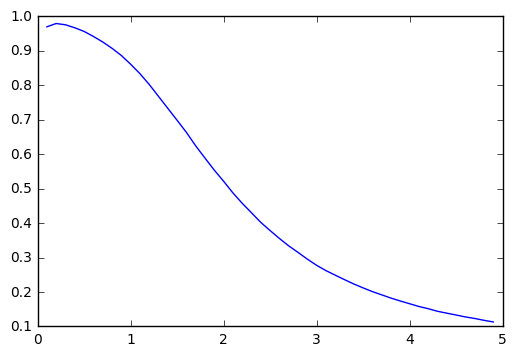

In [20]:
plt.plot(sigma_range, achievable_spearman)